## Not A Unit Test :D 

In [26]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    
np.set_printoptions(precision=5)

In [33]:
lincar = envs.LinearCar()
executer = tools.Rollout(lincar, max_it=100, abort=True)

#policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))
#policy_grad = lambda x, a: np.array([1.,x[0],x[1]]) / a

policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.)
policy_grad = lambda x, a, par: np.array([1.,-x[0],-x[1]])*policy_par(par)(x)

policy = tools.Policy(policy_par,(3), gradient=policy_grad, sigma=0.5)
optimizer = srb.GPOMDP(executer, lincar, max_it=100, eps=0.00000000001,  
                       parameter_domain=np.array([-1,1]), rate = 0.001)

In [34]:
policy.setParameter(np.array([1,1,1]))
trace, i, _ = executer.rollout(policy)
t = trace[10]
print(policy.log_grad(t[1],t[0]))

[ 1.25515 -0.70682 -0.1008 ]


In [ ]:
par, conv = optimizer.optimize(policy)

In [ ]:
optimizer.parameters

Best Parameter:	[ -3.28968e+09   1.57498e+11   3.20014e+09]
Best Reward: 	-102.278844588


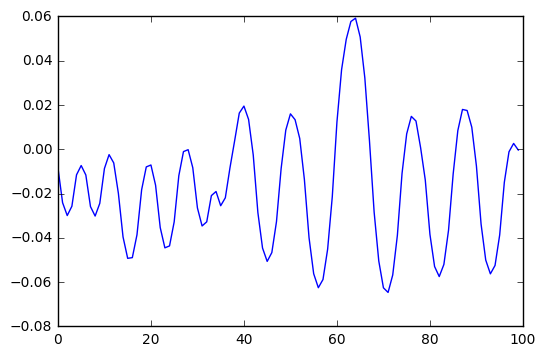

In [20]:
print("Best Parameter:\t"+str(optimizer.best_parameter))
print("Best Reward: \t"+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace, i, achieved = executer.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()